# Let's Grow More - "Data Science Intern"


## LGMVIP - August 2023


## By - Mehul Sharma

## Beginner Task

### Task-3 -  : Music Recommendation:



In [1]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
song=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\LGM\Music Recc\songs.csv")
mem=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\LGM\Music Recc\members.csv")
train=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\LGM\Music Recc\train.csv")
test=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\LGM\Music Recc\test.csv")

In [4]:
song.head(7)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0


In [5]:
mem.head(7)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329


In [6]:
train.head(7)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1


In [7]:
test.head(7)

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
5,5,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,NV3nhEcMqsawwvSNTUAt9IVAexHLOm0lDfrHyEfN5B0=,radio,Radio,radio
6,6,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,DPM6G9RB5QO2dvAVPyc70gxHdvu872IjTUvV6LJT8ho=,radio,Radio,radio


In [8]:
song.describe()


,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [9]:
mem.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [10]:
song.shape

(2296320, 7)

In [11]:
train.shape

(7377418, 6)

In [12]:
mem.shape

(34403, 7)

In [13]:
test.shape

(2556790, 6)

In [14]:
train.isnull().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [16]:
song.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

In [17]:
song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [18]:
mem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [19]:
mem.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

## Data Visualization

<Axes: xlabel='source_system_tab', ylabel='count'>

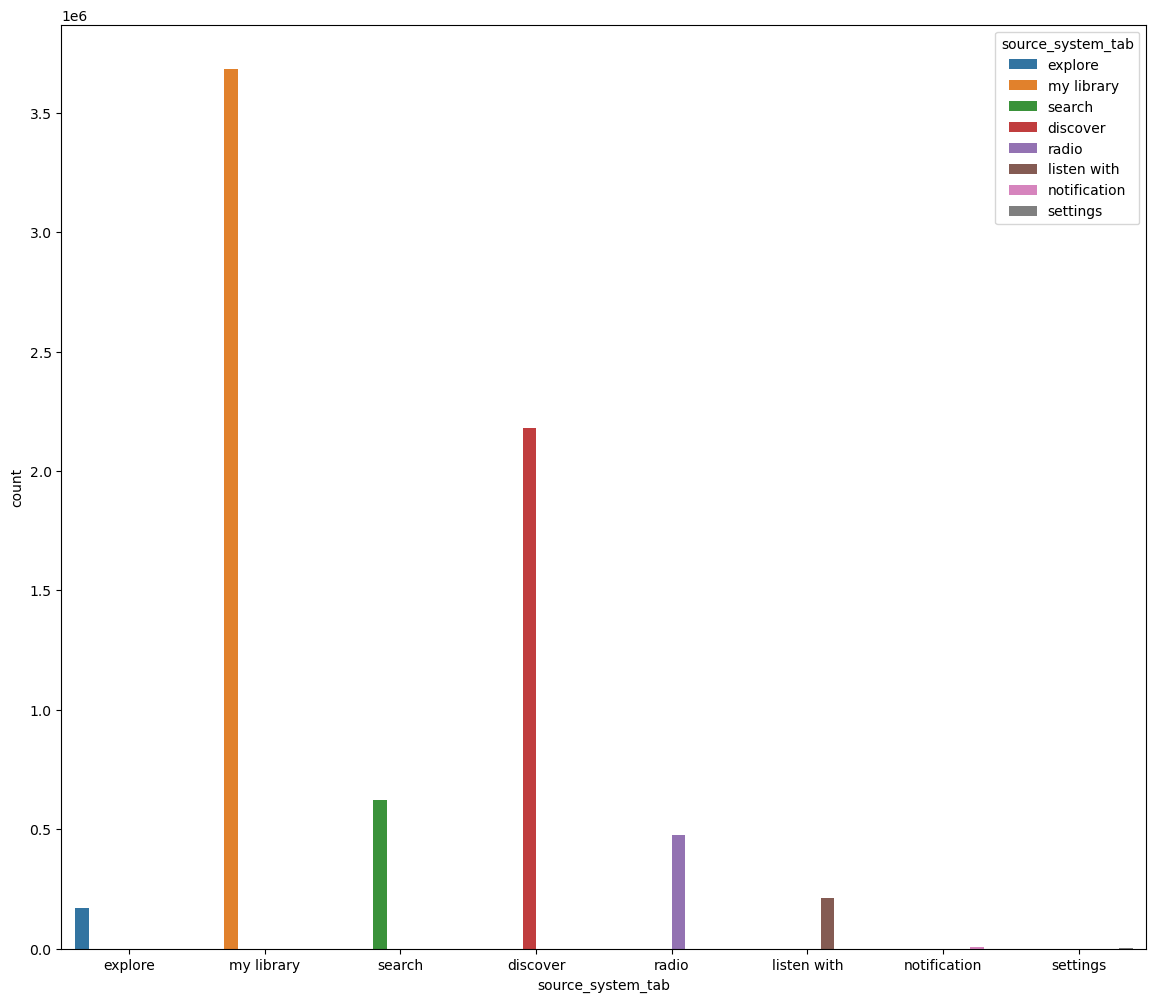

In [20]:
plt.figure(figsize=(14,12))
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab'])


<Axes: xlabel='source_system_tab', ylabel='count'>

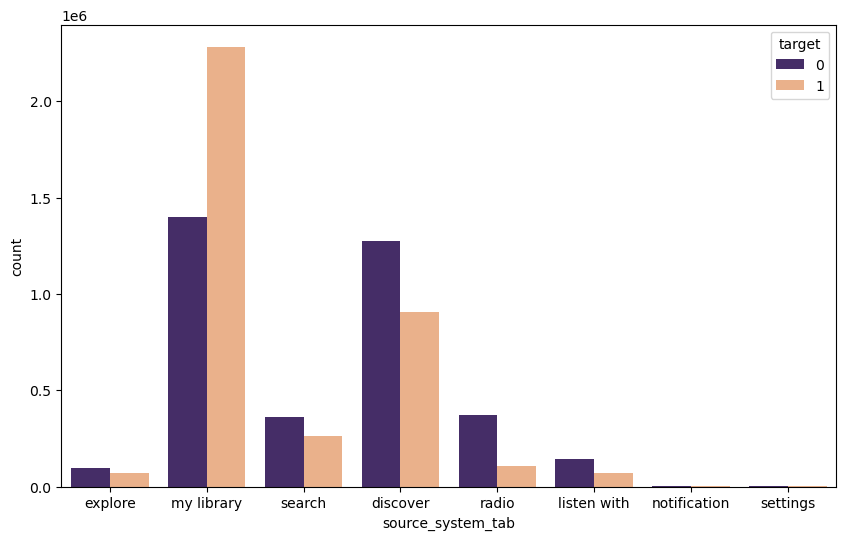

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x = train['source_system_tab'],palette=['#432371',"#FAAE7B"],hue=train['target'])

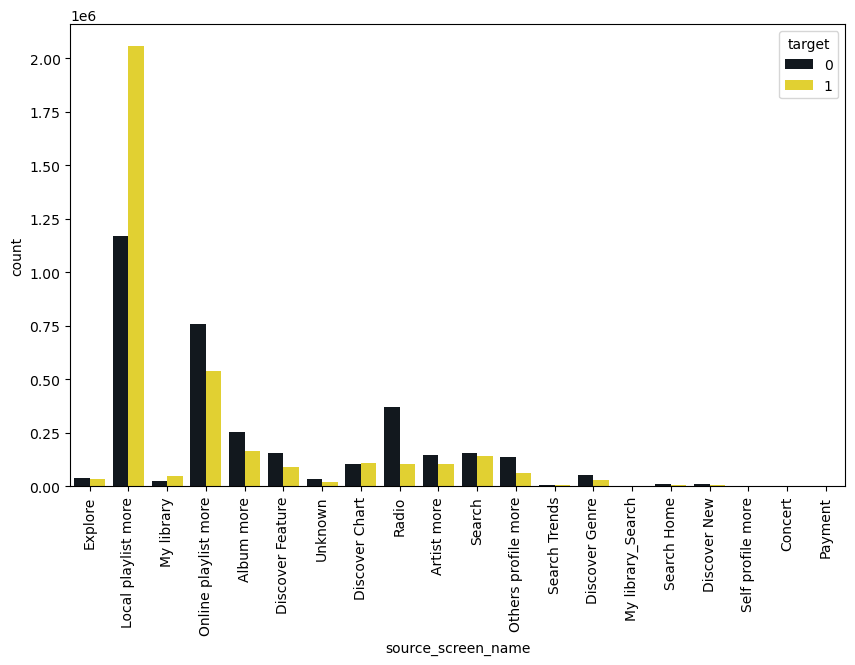

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x = train['source_screen_name'],palette=['#101820','#FEE715'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

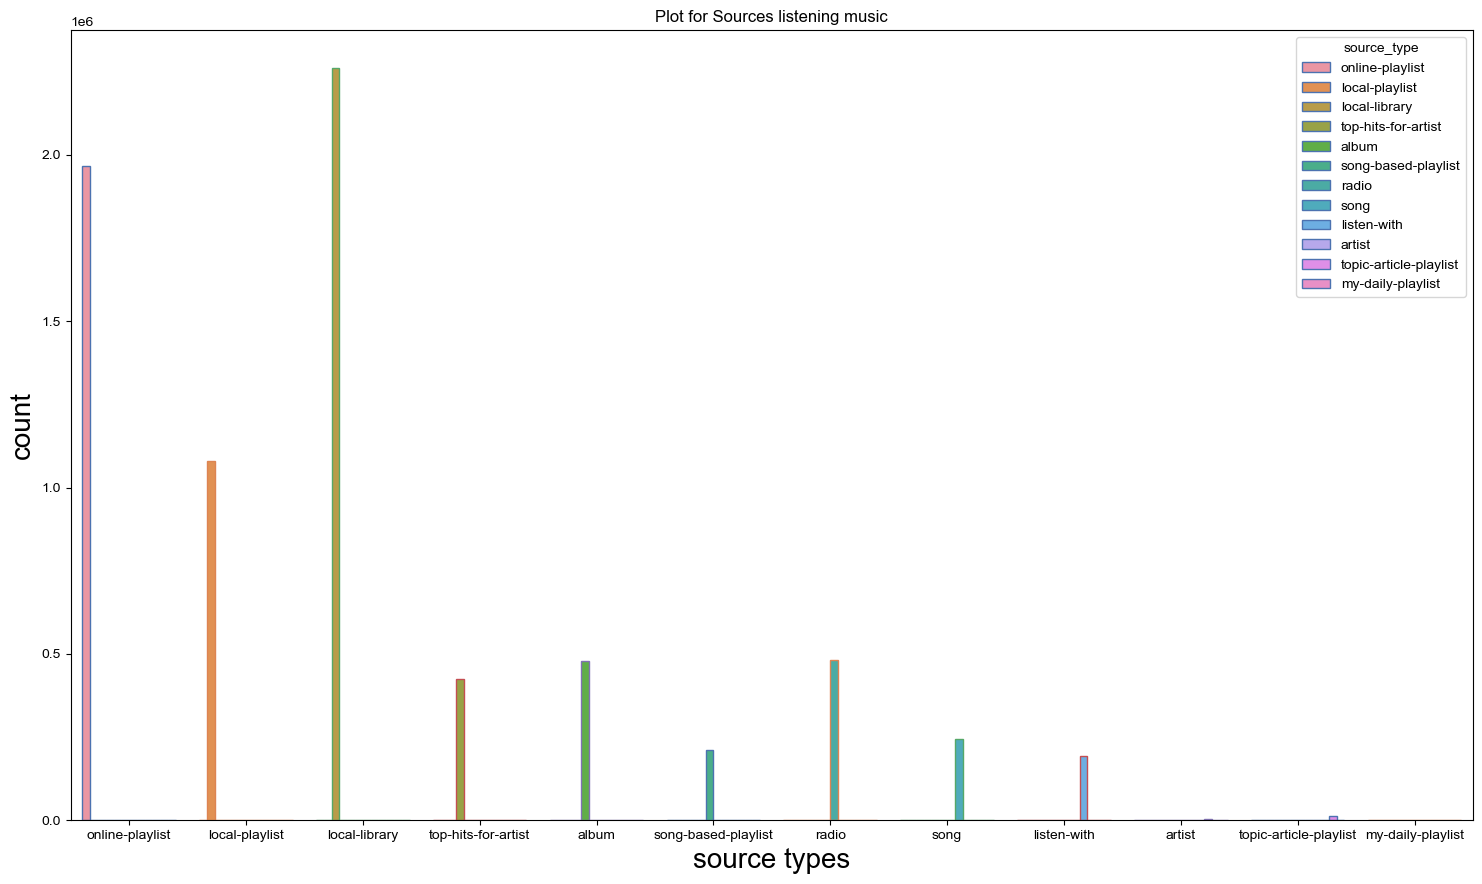

In [23]:
plt.figure(figsize=(15,9))
sns.countplot(x='source_type',hue='source_type',data=train,edgecolor=sns.color_palette('deep',5))
sns.set(style="ticks")
plt.xlabel('source types',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation='horizontal')
plt.title('Plot for Sources listening music')
plt.tight_layout()

<Axes: xlabel='language', ylabel='count'>

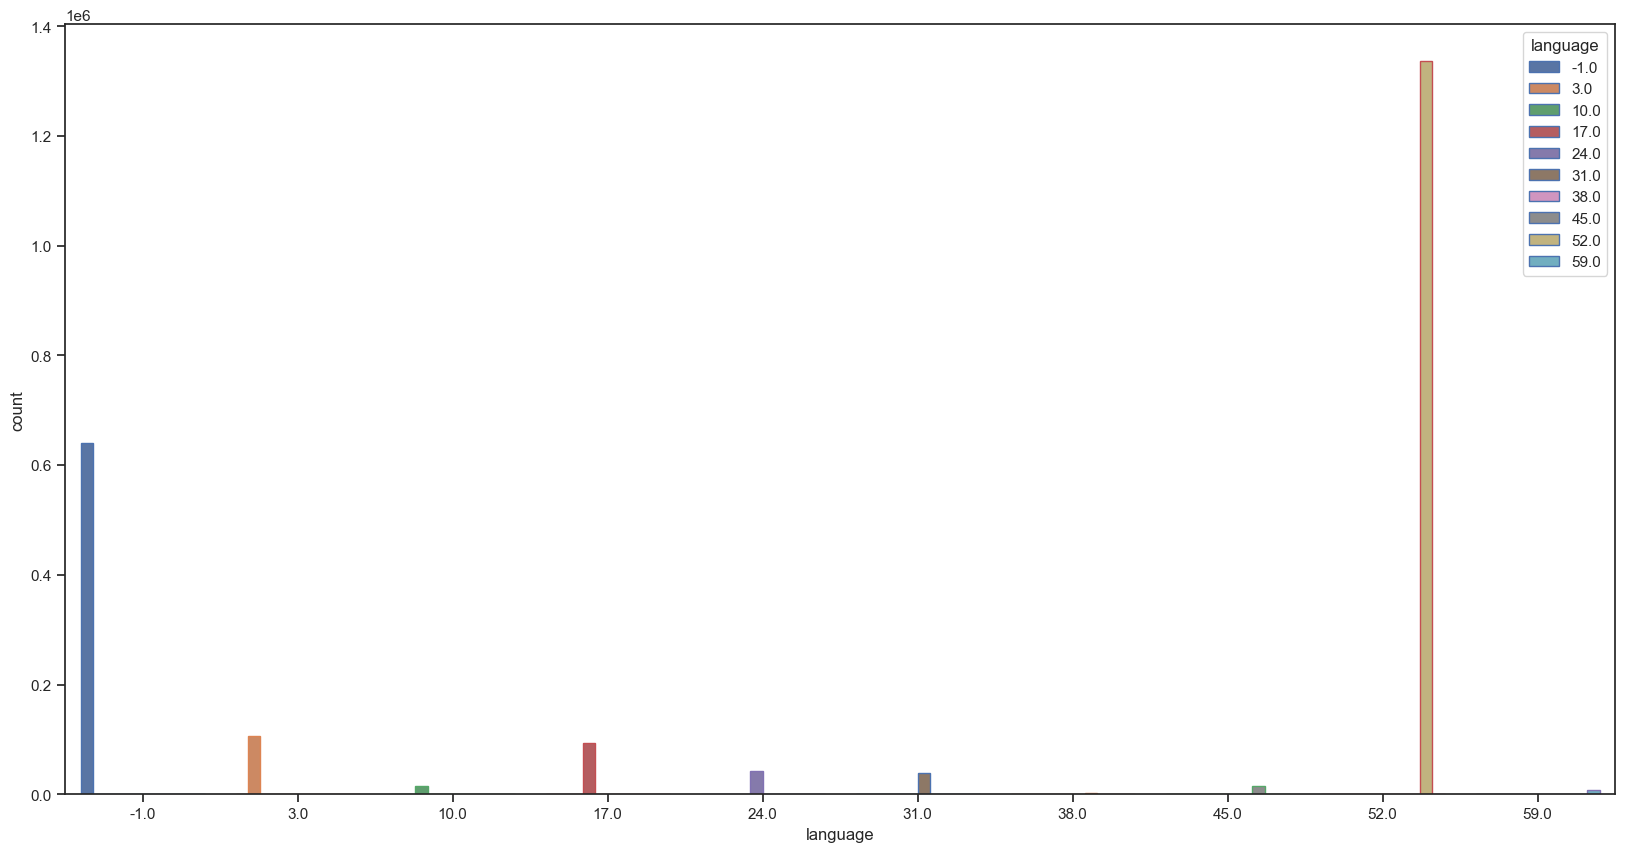

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x='language',hue='language',data=song,edgecolor=sns.color_palette('deep',5))

<Axes: xlabel='registered_via', ylabel='count'>

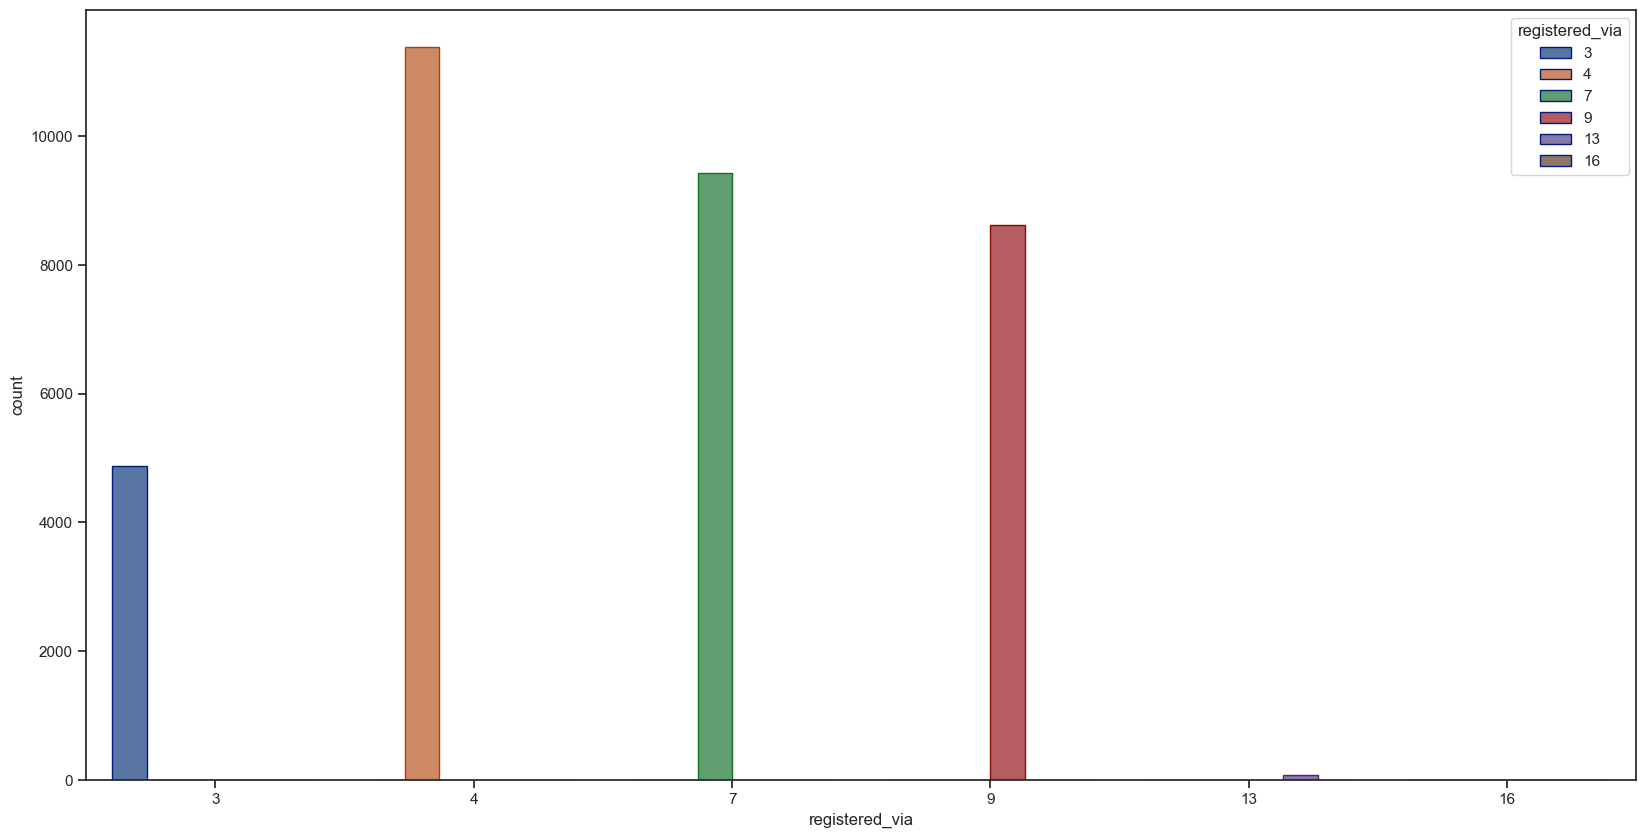

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x='registered_via', hue='registered_via',data=mem,edgecolor=sns.color_palette("dark", 5))

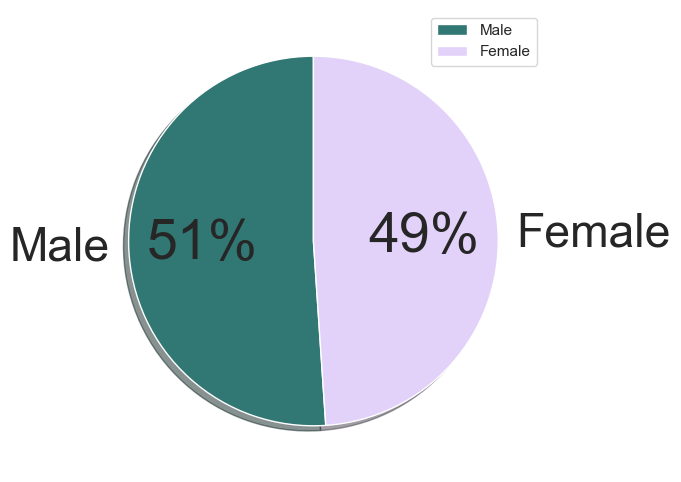

In [26]:
plt.rcParams['font.size'] = 40.0
labels = ['Male','Female']
colors = ['#317773','#E2D1F9']
plt.figure(figsize = (6, 6))
sizes = pd.value_counts(mem.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels,colors=colors, autopct='%.0f%%',
                                    shadow=True, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

## Training and Testing

In [3]:
pgn = 6000
ptn= 1500
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
tst=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\LGM\Music Recc\train.csv',names=names, skiprows=pgn,nrows=ptn)


In [4]:
test=tst.drop(['target'],axis=1)
ptr=np.array(tst['target'])
t_name=['id','msno','song_id','source_system_tab','source_screen_name','source_type']
test['id']=np.arange(ptn)
test=test[t_name]

In [5]:
s_col=['song_id','artist_name','genre_ids','song_length','language']
train=train.merge(song[s_col],on='song_id', how='left')
test=test.merge(song[s_col],on='song_id', how='left')

In [6]:
mem['registration_year']=mem['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
mem['registration_month']=mem['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
mem['registration_date']=mem['registration_init_time'].apply(lambda x: int(str(x)[6:8]))


In [7]:
mem['expiration_year']=mem['expiration_date'].apply(lambda x: int(str(x)[0:4]))
mem['expiration_month']=mem['expiration_date'].apply(lambda x: int(str(x)[4:6]))
mem['expiration_date']=mem['expiration_date'].apply(lambda x: int(str(x)[6:8]))
mem=mem.drop(['registration_init_time'], axis=1)

In [9]:
m_col=mem.columns
train=train.merge(mem[m_col],on='msno', how='left')
test=test.merge(mem[m_col],on='msno', how='left')

In [10]:
train=train.fillna(-1)
test=test.fillna(-1)

In [11]:
import gc
del mem, song; gc.collect();

In [12]:
cls=list(train.columns)
cls.remove('target')

In [13]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for cl in tqdm(cls):
    if train[cl].dtype =='object':
        train[cl]=train[cl].apply(str)
        test[cl]=test[cl].apply(str)
        Labele=LabelEncoder()
        train_value=list(train[cl].unique())
        test_value = list(test[cl].unique())
        Labele.fit(train_value + test_value)
        train[cl] = Labele.transform(train[cl])
        test[cl] = Labele.transform(test[cl])

100%|██████████| 19/19 [01:28<00:00,  4.65s/it]


In [14]:
uni = range(max(train['song_id'].max(), test['song_id'].max()))
s_ppl = pd.DataFrame({'song_id': uni, 'popularity':0})
tr_sorted = train.sort_values('song_id')
tr_sorted.reset_index(drop=True, inplace=True)
tt_sorted = test.sort_values('song_id')
tt_sorted.reset_index(drop=True, inplace=True)

## Model Building

In [15]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
Y = train['target'].values

In [16]:
X_tt = np.array(test.drop(['id'], axis=1))
i = test['id'].values

del train, test; gc.collect();

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.1, random_state = 12)
    
del X, Y; gc.collect();

In [17]:
d_train = lgb.Dataset(X_train, label=Y_train)
d_valid = lgb.Dataset(X_valid, label=Y_valid) 

tlist = [d_train, d_valid]

In [25]:
def predict(m1):
    mod = m1.fit(X_train,Y_train)
    print('Training Score : {}'.format(mod.score(X_train,Y_train)))
    Y_pred = mod.predict(X_valid)
    V_test = mod.predict(X_tt)
    pgt = (V_test>0.5).astype(int)
    c = (pgt==ptr).astype(int)
    acc = c.sum()/c.size*100
    print("Accuracy for the model", acc)

In [26]:
from sklearn.linear_model import LogisticRegression
predict(LogisticRegression())

Training Score : 0.5121212239874355
Accuracy for the model 65.0


### Lgm Model

In [21]:
bar = {}
bar['learning_rate'] = 0.4
bar['application'] = 'binary'
bar['max_depth'] = 15
bar['num_leaves'] = 2**8
bar['verbosity'] = 0
bar['metric'] = 'auc'

model1 = lgb.train(bar, train_set=d_train, num_boost_round=200, valid_sets=tlist)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [28]:
p_test = model1.predict(X_tt)

In [29]:
pgt = (p_test>0.5).astype(int)
c = (pgt==ptr).astype(int)
acc1 = c.sum()/c.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc1))

The accuracy of lgbm model on test data is: 82.466667%
